# Math 110A HW5

## Francisco Banuelos

## 1)

The Heavy ball method is given by 

$$\vec{x_{k+1}}=\vec{x_{k}}-\alpha\vec{p_{k}}$$
$$ \vec{p_{k}}=Df(\vec{x_{k}})+\beta \vec{p_{k-1}}$$

As given in lecture, the optimal values of $\alpha$, $\beta$ when $f$ strongly smooth and strongly convex are given by

$$ \alpha=\frac{4}{(L^{1/2}+\mu^{1/2})^{2}}$$
$$ \beta=\frac{(L^{1/2}-\mu^{1/2})^{2}}{(L^{1/2}+\mu^{1/2})^{2}}$$

where $L$, $\mu$ are respectively the approximate maximum and minimum eigenvalues of the Hessian matrix of $f$.

Fletcher-Reeves with Heavy Ball is simply using the series of values of $\beta$ from  Fletcher-Reeves given by

$$ \beta_{k}=\frac{\nabla f_{k+1}^{T}f_{k+1}}{\nabla f_{k}^{T}f_{k}}$$

while retaining $\alpha$.

## A & B

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a,b = 1,100    # parameters for Rosenbrock function
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])
d2f=lambda x,y: np.array([[800*x**2-400*(y-x**2)+2,-400*x],[-400*x,200]])

In [3]:
def FR_beta(Dfk,Dfk1):
    return (Dfk1@Dfk1) / (Dfk@Dfk)

In [4]:
eigs, _ = np.linalg.eigh(d2f(1,1))
print(eigs)

print('alpha = ',4/(np.sqrt(eigs[0])+np.sqrt(eigs[1]))**2)
print('beta = ',(np.sqrt(eigs[1])-np.sqrt(eigs[0]))**2/(np.sqrt(eigs[1])+np.sqrt(eigs[0]))**2)
maxval = eigs[1]
minval = eigs[0]
print('Maximum eigenvalue :',maxval,'\nMinimum eigenvalue :',minval)

[3.99360767e-01 1.00160064e+03]
alpha =  0.0038387715930902127
beta =  0.9232245681381966
Maximum eigenvalue : 1001.6006392325123 
Minimum eigenvalue : 0.3993607674876216


In [5]:
from matplotlib.colors import LogNorm  # useful for visualizing this function

def plot_path_Rose(path, func, title, window=[-4.5,4.5,-4.5,4.5], contours=np.logspace(-2,6,100), skip=1):
    '''Plots path defined in (N,2) array "path" on a contour plot of "func" in window "window"'''
    plt.figure(figsize=(5,5),dpi=150)
    X = np.linspace(window[0],window[1],300)
    Y = np.linspace(window[2],window[3],300)
    Xmesh, Ymesh = np.meshgrid(X,Y)
    Z = func(Xmesh,Ymesh)
    CS = plt.contourf(Xmesh, Ymesh, Z, contours, cmap='jet', norm = LogNorm())
    plt.axis(window)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    if path is not None:
        for i in range(path.shape[0]-1): # iterate through steps
            if i%skip==0:
                # only plot arrows every "skip" iterations
                plt.arrow(path[i,0],path[i,1],path[i+1,0]-path[i,0],path[i+1,1]-path[i,1],
                          color='k',length_includes_head=True)
    plt.show()

In [6]:
x = np.array([1.2,1.2])
path_HB_RB = [x]
tol = 1e-8
beta = (np.sqrt(maxval)-np.sqrt(eigs[0]))**2/(np.sqrt(maxval)+np.sqrt(eigs[0]))**2  # optimal(?) momentum parameter
print('beta = ',beta)
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(maxval))**2                                      # optimal(?) step size
print('alpha = ',alpha)
max_steps = 20000
dx = df(x[0],x[1])
pk = dx*0      
i=0
iterl=[0]
norml=[np.linalg.norm(dx)]
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -alpha*dx + beta*pk
    xnew = x + pk
    path_HB_RB.append(xnew)
    x = xnew
    i += 1
    iterl.append(i)
    dx = df(x[0],x[1])
    norml.append(np.linalg.norm(dx))

path_HB_RB = np.array(path_HB_RB)
norml1=np.array(norml)
iterl1=np.array(iterl)
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

beta =  0.9232245681381966
alpha =  0.0038387715930902127
After 20 iterations, approximate minimum is nan at [nan inf]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


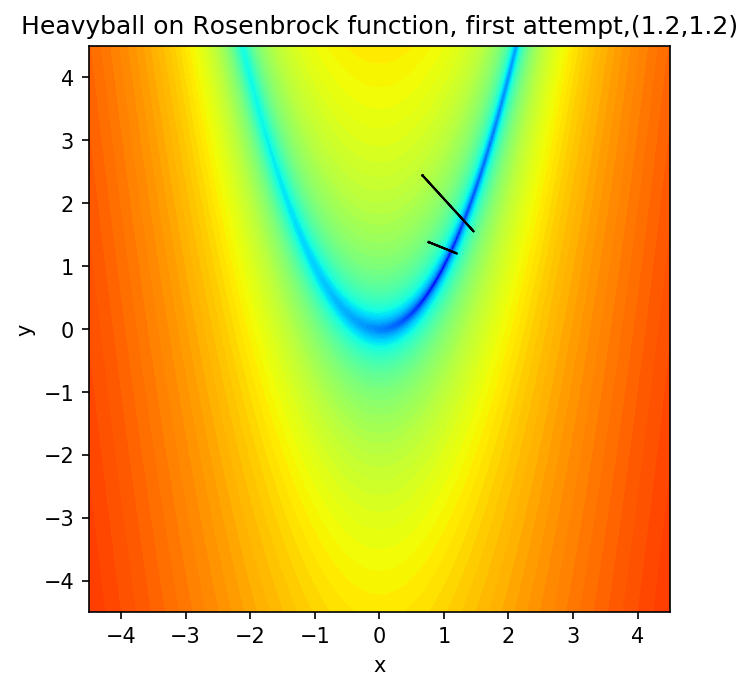

Text(0, 0.5, 'Norm of Gradient')

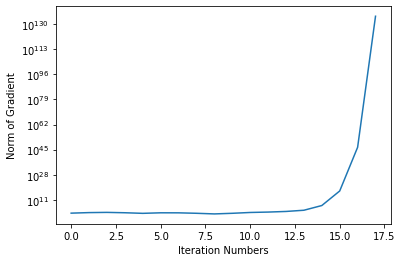

In [7]:
plot_path_Rose(path_HB_RB,f,'Heavyball on Rosenbrock function, first attempt,(1.2,1.2)', skip=10)
plt.plot(iterl1,norml1)
plt.yscale("log")
plt.xlabel('Iteration Numbers')
plt.ylabel('Norm of Gradient')

In [8]:
for i in range(1000):
    x = np.random.uniform(-4.5,4.5,2) # generate a random point
    H = d2f(x[0],x[1])                # and evaluate the Hessian there
    tmp_eigs, _ = np.linalg.eigh(H)
    if tmp_eigs[1]>maxval:                # if eigenvalues larger or smaller, choose those
        maxval = tmp_eigs[1]
    if tmp_eigs[0]<minval:
        minval = tmp_eigs[0]
        
print('Maximum eigenvalue :',maxval,'\nMinimum eigenvalue :',minval)

Maximum eigenvalue : 25709.612262623785 
Minimum eigenvalue : -1714.9896152324347


In [9]:
x = np.array([1.2,1.2])
path_HB_RB = [x]
tol = 1e-8
beta = (np.sqrt(maxval)-np.sqrt(eigs[0]))**2/(np.sqrt(maxval)+np.sqrt(eigs[0]))**2  # optimal(?) momentum parameter
print('beta = ',beta)
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(maxval))**2                                      # optimal(?) step size
print('alpha = ',alpha)
max_steps = 20000
dx = df(x[0],x[1])
pk = dx*0      
i=0
iterl=[0]
norml=[np.linalg.norm(dx)]
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -alpha*dx + beta*pk
    xnew = x + pk
    path_HB_RB.append(xnew)
    x = xnew
    i += 1
    dx = df(x[0],x[1])
    iterl.append(i)
    norml.append(np.linalg.norm(dx))

path_HB_RB = np.array(path_HB_RB)
norml1=np.array(norml)
iterl1=np.array(iterl)
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

beta =  0.984358502784184
alpha =  0.00015436465232701734
After 2575 iterations, approximate minimum is 5.674798356837278e-17 at [0.99999999 0.99999998]


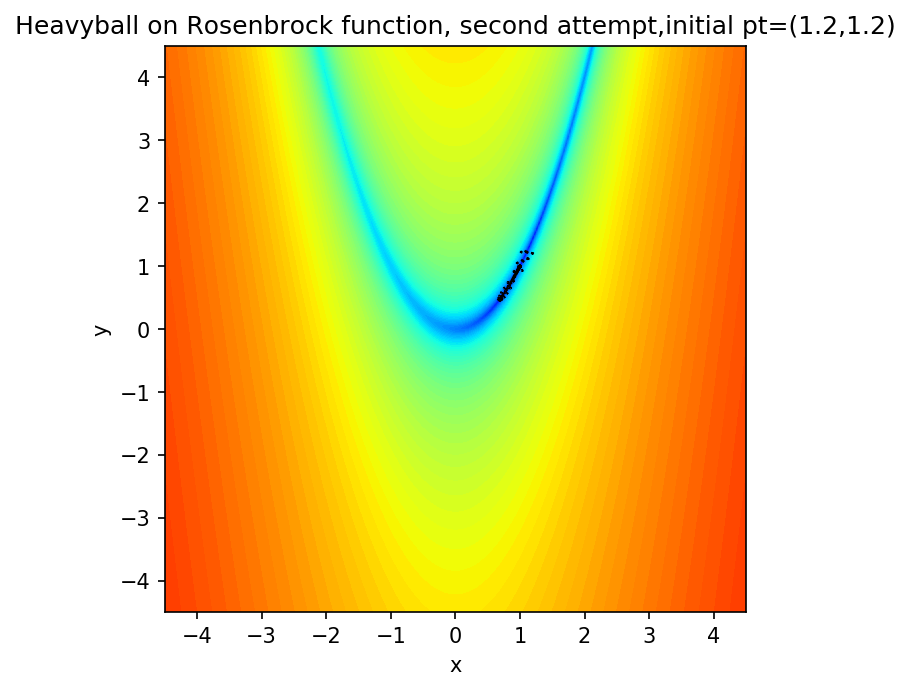

Text(0, 0.5, 'Gradient Norm')

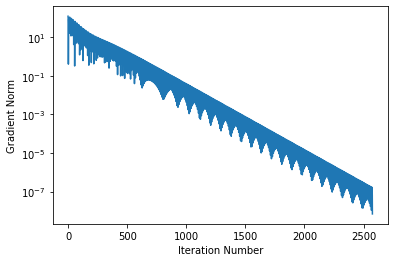

In [10]:
plot_path_Rose(path_HB_RB,f,'Heavyball on Rosenbrock function, second attempt,initial pt=(1.2,1.2)', skip=10)
plt.plot(iterl1,norml1)

plt.yscale("log")
plt.xlabel('Iteration Number')
plt.ylabel('Gradient Norm')



In [11]:
# Fletcher-Reeves
x = np.array([1.2,1.2])
path_FR1_Rose = [x]
tol = 1e-8
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(maxval))**2
max_steps = 20000
dx = df(x[0],x[1])
pk = -dx    
i=0
iterl=[0]
norml=[np.linalg.norm(dx)]
while np.linalg.norm(dx)>tol and i<max_steps:
    xnew = x + alpha*pk
    dx1 = df(xnew[0],xnew[1])
    bk = FR_beta(dx,dx1)    #  adaptive beta
    if i>0 and i%3 ==0:
        bk = 0    # restarting
    pk = -dx1 + bk*pk

    path_FR1_Rose.append(xnew)
    x = xnew
    dx = dx1
    i += 1
    iterl.append(i)
    norml.append(np.linalg.norm(dx))

path_FR1_Rose=np.array(path_FR1_Rose)
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

After 20000 iterations, approximate minimum is 0.00012697723730045138 at [1.01125953 1.02269058]


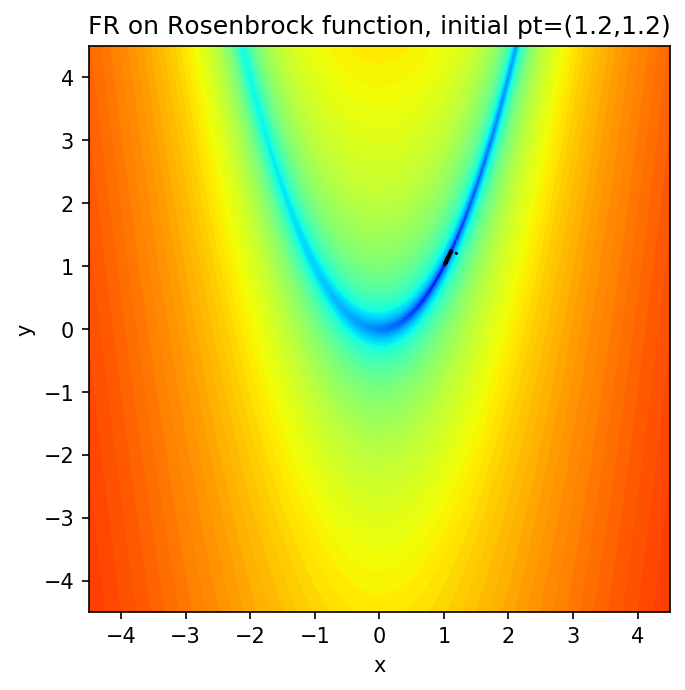

Text(0, 0.5, 'Gradient Norm')

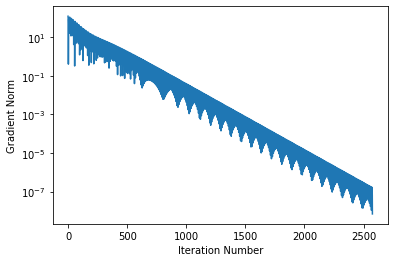

In [12]:
plot_path_Rose(path_FR1_Rose,f,'FR on Rosenbrock function, initial pt=(1.2,1.2)', skip=10)
plt.plot(iterl1,norml1)

plt.yscale("log")
plt.xlabel('Iteration Number')
plt.ylabel('Gradient Norm')

## Comments
For this exercise, the heavyball method was used two times. The first attempt was directly trying to use the eigenvalues of the Hessian matrix at the minimizer. These were used to calculate the corresponding values of alpha and beta as seen in the equations from lecture above. This method does not converge for such values.

The second attempt involved a random sampling of a point in the interval $(-4.5,4.5) x (-4.5,4.5)$(as taken from discussion in class) and estimating the eigenvalues of the Hessian there. It turns out the if these eigenvalues are used, the values of alpha and beta calculated according to the equations from lecture above, the method converges. 

If the same values of alpha are used for heavy ball along with Fletcher Reeves, the method also converges approximately to the minimizer at $(1,1)$.

By visualizing the path, we can get better intuition about the behaviour of the algorithms as they get close to the minimizer. For pure heavy ball, the algorithm appears to take more steps to get to the minimizer indicating that it probably overshoots more often when compared to Heavy ball with Fletcher Reeves.





## C)

In [13]:
x = np.array([-1.2,1])
path_HB_RB = [x]
tol = 1e-8
beta = (np.sqrt(maxval)-np.sqrt(eigs[0]))**2/(np.sqrt(maxval)+np.sqrt(eigs[0]))**2  # optimal(?) momentum parameter
print('beta = ',beta)
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(maxval))**2                                      # optimal(?) step size
print('alpha = ',alpha)
max_steps = 20000
dx = df(x[0],x[1])
pk = dx*0      
i=0
iterl=[0]
norml=[np.linalg.norm(dx)]
while np.linalg.norm(dx)>tol and i<max_steps:
    pk = -alpha*dx + beta*pk
    xnew = x + pk
    path_HB_RB.append(xnew)
    x = xnew
    i += 1
    dx = df(x[0],x[1])
    iterl.append(i)
    norml.append(np.linalg.norm(dx))

path_HB_RB = np.array(path_HB_RB)
norml1=np.array(norml)
iterl1=np.array(iterl)
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

beta =  0.984358502784184
alpha =  0.00015436465232701734
After 2736 iterations, approximate minimum is 1.0041726497635731e-16 at [1.00000001 1.00000002]


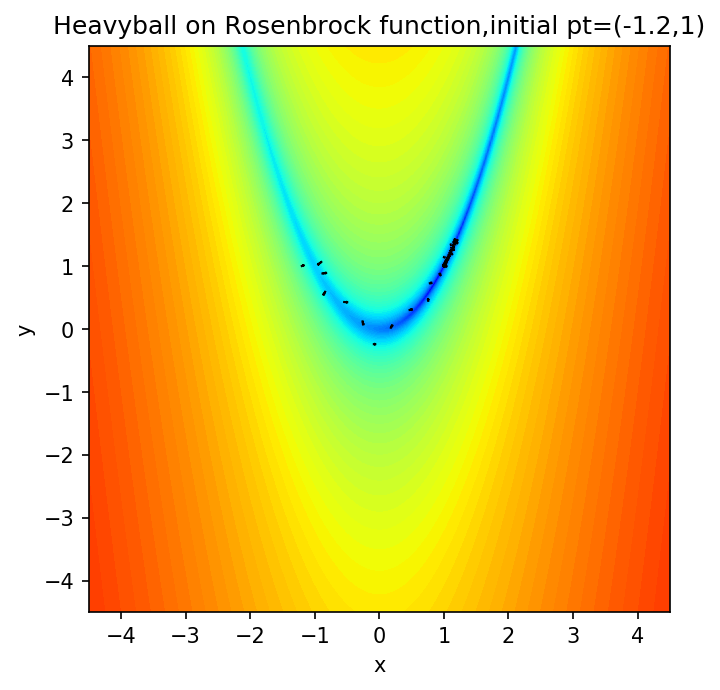

Text(0, 0.5, 'Gradient Norm')

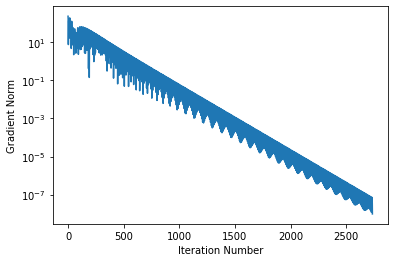

In [14]:
plot_path_Rose(path_HB_RB,f,'Heavyball on Rosenbrock function,initial pt=(-1.2,1)', skip=10)
plt.plot(iterl1,norml1)

plt.yscale("log")
plt.xlabel('Iteration Number')
plt.ylabel('Gradient Norm')


In [15]:
# Fletcher-Reeves
x = np.array([-1.2,1])
path_FR1_Rose = [x]
tol = 1e-8
alpha = 4/(np.sqrt(eigs[0])+np.sqrt(maxval))**2
max_steps = 20000
dx = df(x[0],x[1])
pk = -dx    # first step is steepest descent
i=0
iterl=[0]
norml=[np.linalg.norm(dx)]
while np.linalg.norm(dx)>tol and i<max_steps:
    xnew = x + alpha*pk
    dx1 = df(xnew[0],xnew[1])
    bk = FR_beta(dx,dx1)    # still use adaptive beta
    if i>0 and i%3 ==0:
        bk = 0    # restarting
    pk = -dx1 + bk*pk

    path_FR1_Rose.append(xnew)
    x = xnew
    dx = dx1
    i += 1
    iterl.append(i)
    norml.append(np.linalg.norm(dx))

path_FR1_Rose=np.array(path_FR1_Rose)
print(f'After {i} iterations, approximate minimum is {f(x[0],x[1])} at {x}')

After 20000 iterations, approximate minimum is 0.0013719927514141228 at [0.96299054 0.92719936]


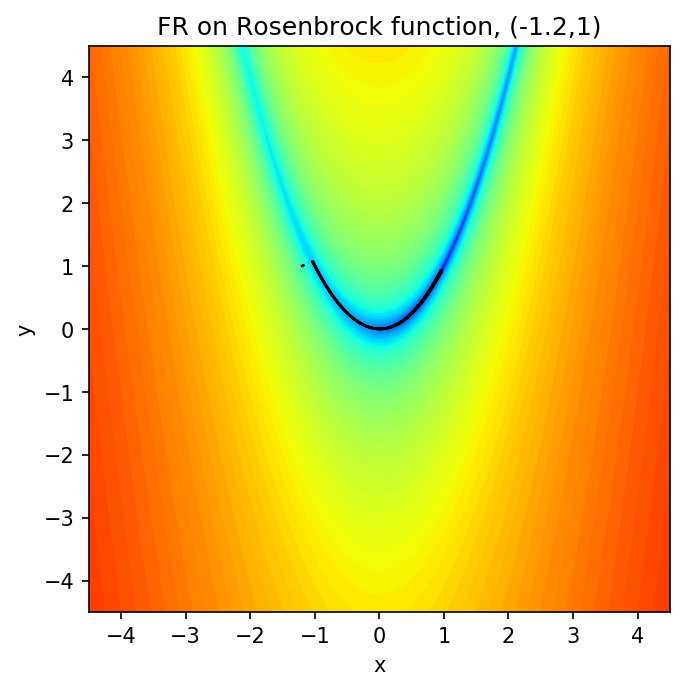

Text(0, 0.5, 'Gradient Norm')

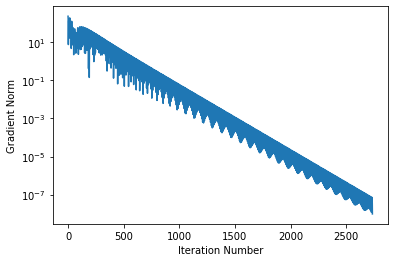

In [16]:
plot_path_Rose(path_FR1_Rose,f,'FR on Rosenbrock function, (-1.2,1)', skip=10)
plt.plot(iterl1,norml1)

plt.yscale("log")
plt.xlabel('Iteration Number')
plt.ylabel('Gradient Norm')

## Comments
Both methods converge from this initial point. Heavy Ball with Fletcher Reeves converge with a much smoother path compared to pure heavy ball.